In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn import metrics
import matplotlib as mpl
from scipy import stats
mpl.rc("figure", figsize=(35, 10))

In [3]:
import warnings
warnings.filterwarnings('ignore') 

In [4]:
df = pd.read_excel('/content/drive/My Drive/sample.xlsx', index_col=0)
pd.set_option("display.max_columns", None)
df.tail(3)

,Week_No,Investigation_Created_Day,Investigation_Created_Date_Time,Recording_Year,Age,Gender,Nationality,Occupation,District,Municipality,City,Hospital_Name,The_Final_Diagnosis,Population,Temperature,Precipitation,Wind_Speed,Humidity,Elevation,Area_CL,Area_HC,Area_TC,Area_SV,Urban_Area,Bare_Area,Area_CBA,Area_UBA,Water_Area
Investigation_Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,Saturday,2011-12-31,2012,26.0,Male,Saudi,Soldier,An Naseem,NaN,Jeddah,Maternity and Children's Hospital,Confirmed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Saturday,2011-12-31,2012,15.0,Male,Saudi,Student,Ghulail,Um Asalam Municipality,Jeddah,Andalusia Hai Al-Jamea Hospital,Confirmed,16867.0,29.157257,29.832464,1.0,0.012459,15.321481,0.0,1170000.0,0.0,0.0,4050000.0,180000.0,0.0,1440000.0,0.0
3,3.0,Saturday,2011-12-31,2012,24.0,Female,Saudi,Student,An Naseem,Dahaban Municipality,Jeddah,Andalusia Hai Al-Jamea Hospital,Confirmed,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,8460000.0,0.0,0.0,0.0,0.0


In [5]:
df.shape
#df['Investigation_Created_Day'].value_counts()

(1115, 28)

In [6]:
#df=df[['Investigation_Created_Date_Time','District','Population', 'Temperature', 'Precipitation', 'Wind_Speed','Humidity', 'Elevation', 'The_Final_Diagnosis']]

In [7]:
#df['dengu_stat'] = df.groupby(['Investigation_Created_Date_Time', 'District'])['The_Final_Diagnosis'].transform('count')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 1 to 1115
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Week_No                          833 non-null    float64       
 1   Investigation_Created_Day        765 non-null    object        
 2   Investigation_Created_Date_Time  1114 non-null   datetime64[ns]
 3   Recording_Year                   1115 non-null   int64         
 4   Age                              1100 non-null   float64       
 5   Gender                           1115 non-null   object        
 6   Nationality                      1105 non-null   object        
 7   Occupation                       627 non-null    object        
 8   District                         870 non-null    object        
 9   Municipality                     818 non-null    object        
 10  City                             894 non-null    object     

In [9]:
df.describe()

,Week_No,Recording_Year,Age,Population,Temperature,Precipitation,Wind_Speed,Humidity,Elevation,Area_CL,Area_HC,Area_TC,Area_SV,Urban_Area,Bare_Area,Area_CBA,Area_UBA,Water_Area
count,833.000000,1115.000000,1100.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,7.450000e+02,7.450000e+02,745.0,7.450000e+02,7.450000e+02,7.450000e+02,7.450000e+02,7.450000e+02,7.450000e+02
mean,26.483794,2013.666368,33.071182,33297.624161,26.335262,42.461380,4.104621,0.012999,25.575908,9.253691e+04,1.214094e+05,0.0,9.930201e+04,5.115262e+06,2.011651e+06,6.197315e+04,1.843490e+05,4.034899e+04
std,15.142355,1.132944,16.821134,48408.513336,9.458850,31.563880,1.950323,0.004805,24.768552,2.469696e+05,5.750449e+05,0.0,4.898824e+05,2.992998e+06,5.701349e+06,2.927465e+05,1.212014e+06,2.026011e+05
min,1.000000,2012.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,13.000000,2013.000000,24.000000,1593.000000,29.550385,21.318692,4.990705,0.013038,9.492991,0.000000e+00,0.000000e+00,0.0,0.000000e+00,2.700000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,26.000000,2014.000000,32.000000,13260.000000,29.759796,31.734004,5.058593,0.015112,17.385122,0.000000e+00,0.000000e+00,0.0,0.000000e+00,4.770000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,39.000000,2015.000000,43.000000,43811.000000,29.803925,73.408486,5.137621,0.015445,35.542750,0.000000e+00,0.000000e+00,0.0,9.000000e+04,6.930000e+06,1.800000e+05,0.000000e+00,9.000000e+04,0.000000e+00
max,52.000000,2018.000000,91.000000,226143.000000,30.126726,111.139193,5.642914,0.016370,157.970170,1.440000e+06,5.490000e+06,0.0,1.035000e+07,1.593000e+07,4.572000e+07,2.520000e+06,3.078000e+07,1.980000e+06


# EDA

## NAN Features 

In [21]:
nan_feature=[feature for feature in df.columns if df[feature].isnull().sum()>1]
nan_feature

['Week_No',
 'Investigation_Created_Day',
 'Age',
 'Nationality',
 'Occupation',
 'District',
 'Municipality',
 'City',
 'Hospital_Name',
 'Population',
 'Temperature',
 'Precipitation',
 'Wind_Speed',
 'Humidity',
 'Elevation',
 'Area_CL',
 'Area_HC',
 'Area_TC',
 'Area_SV',
 'Urban_Area',
 'Bare_Area',
 'Area_CBA',
 'Area_UBA',
 'Water_Area']

0    833
1    282
Name: Week_No, dtype: int64


<Figure size 360x360 with 0 Axes>

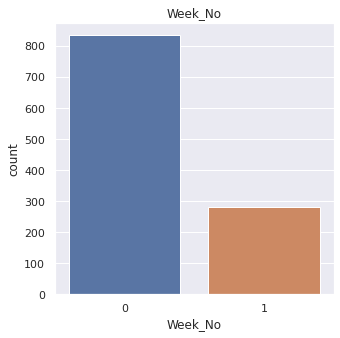

0    765
1    350
Name: Investigation_Created_Day, dtype: int64


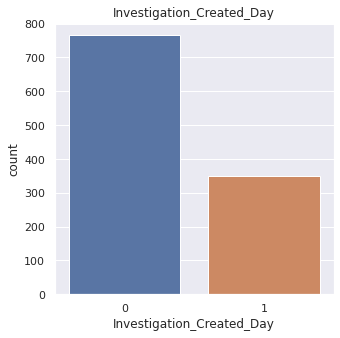

0    1100
1      15
Name: Age, dtype: int64


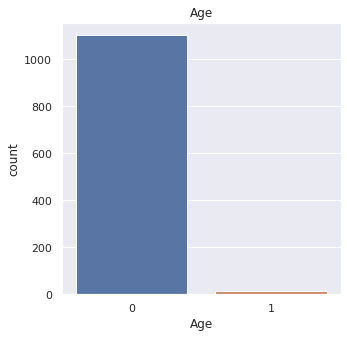

0    1105
1      10
Name: Nationality, dtype: int64


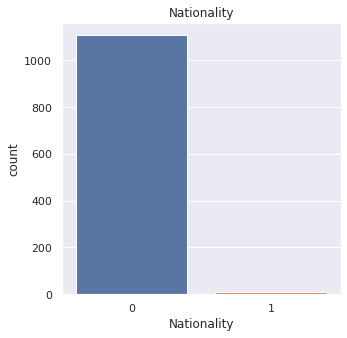

0    627
1    488
Name: Occupation, dtype: int64


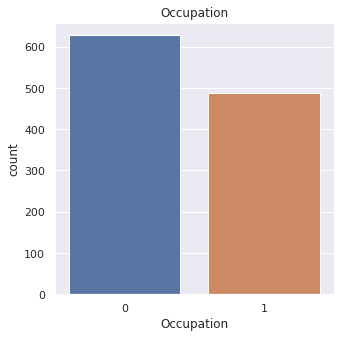

0    870
1    245
Name: District, dtype: int64


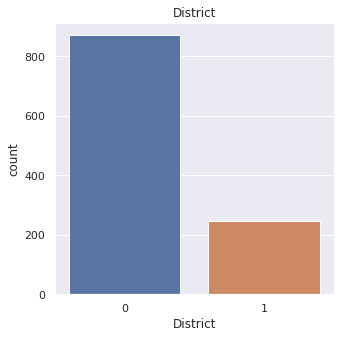

0    818
1    297
Name: Municipality, dtype: int64


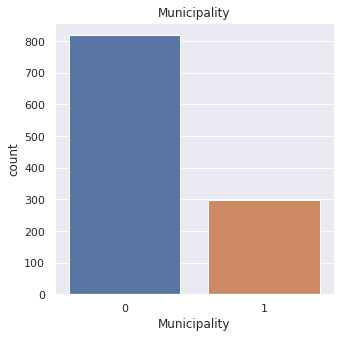

0    894
1    221
Name: City, dtype: int64


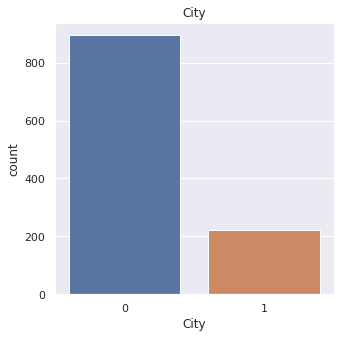

0    816
1    299
Name: Hospital_Name, dtype: int64


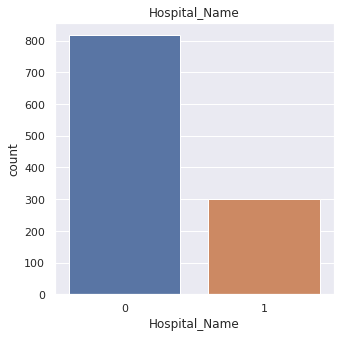

0    745
1    370
Name: Population, dtype: int64


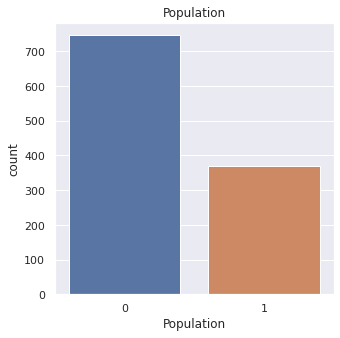

0    745
1    370
Name: Temperature, dtype: int64


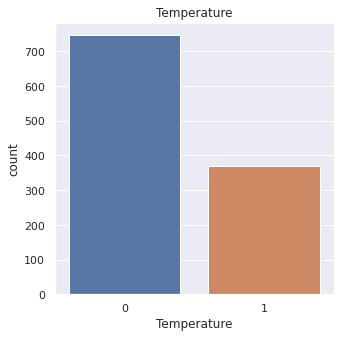

0    745
1    370
Name: Precipitation, dtype: int64


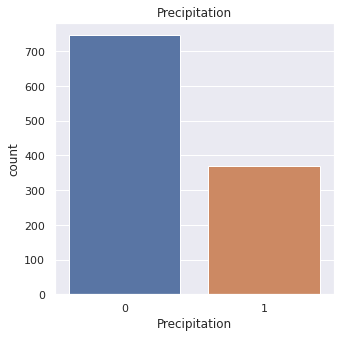

0    745
1    370
Name: Wind_Speed, dtype: int64


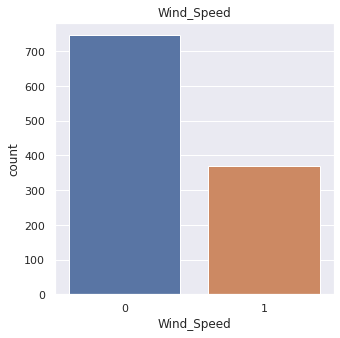

0    745
1    370
Name: Humidity, dtype: int64


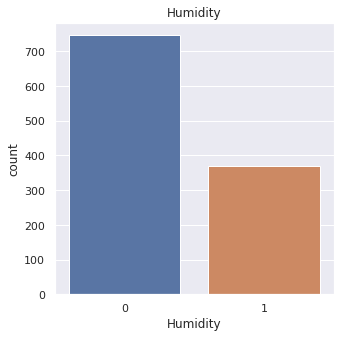

0    745
1    370
Name: Elevation, dtype: int64


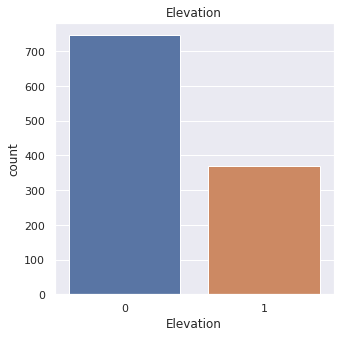

0    745
1    370
Name: Area_CL, dtype: int64


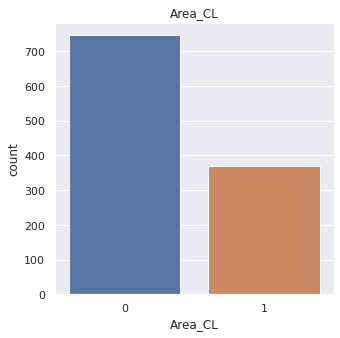

0    745
1    370
Name: Area_HC, dtype: int64


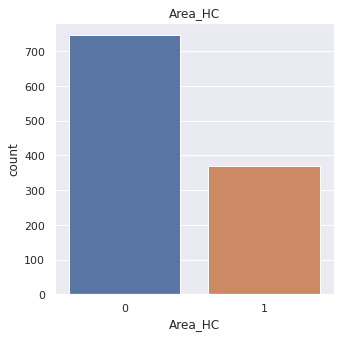

0    745
1    370
Name: Area_TC, dtype: int64


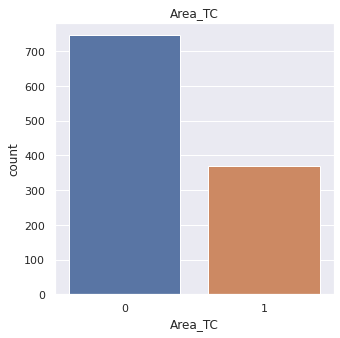

0    745
1    370
Name: Area_SV, dtype: int64


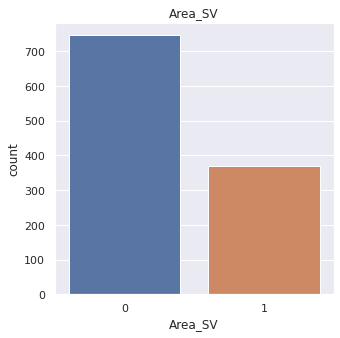

0    745
1    370
Name: Urban_Area, dtype: int64


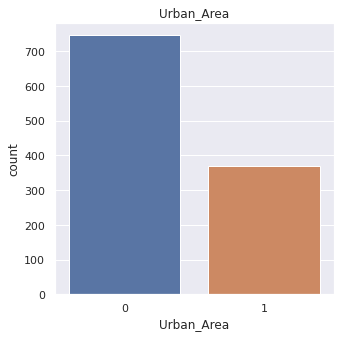

0    745
1    370
Name: Bare_Area, dtype: int64


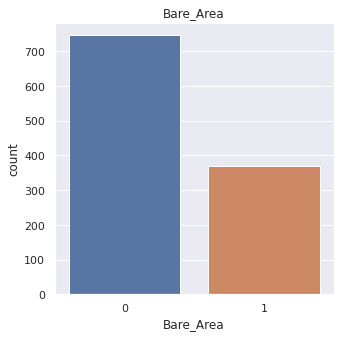

0    745
1    370
Name: Area_CBA, dtype: int64


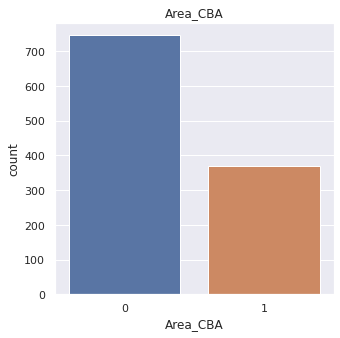

0    745
1    370
Name: Area_UBA, dtype: int64


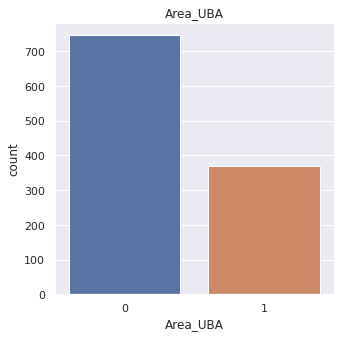

0    745
1    370
Name: Water_Area, dtype: int64


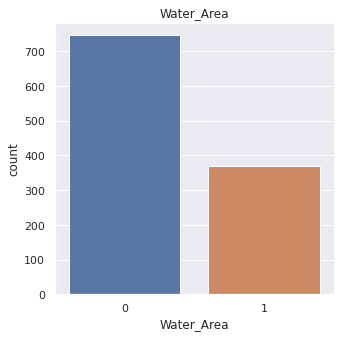

In [22]:
plt.figure(figsize=(5,5))
sns.set(style='darkgrid')
data=df.copy()
for feature in nan_feature:
    plt.figure(figsize=(5,5))
    data[feature]=np.where(data[feature].isnull(),1,0)
    print(data[feature].value_counts())
    plt.title(feature)
    sns.countplot(data[feature])
    plt.show()

# Categorical Features

In [23]:
cat_feature=[feature for feature in df.columns if df[feature].dtypes == 'O']
cat_feature

['Investigation_Created_Day',
 'Gender',
 'Nationality',
 'Occupation',
 'District',
 'Municipality',
 'City',
 'Hospital_Name',
 'The_Final_Diagnosis']

In [24]:
for feature in cat_feature:
    print(feature, len(df[feature].unique()))

Investigation_Created_Day 7
Gender 2
Nationality 33
Occupation 113
District 96
Municipality 14
City 14
Hospital_Name 40
The_Final_Diagnosis 2


In [25]:
df['Recording_Year'].value_counts()

2015    346
2013    299
2014    250
2012    216
2018      2
2017      1
2016      1
Name: Recording_Year, dtype: int64

In [26]:
df['The_Final_Diagnosis'].value_counts()

Confirmed    732
Suspected    383
Name: The_Final_Diagnosis, dtype: int64

In [27]:
dist_count = df['District'].value_counts() > 10
len(dist_count[dist_count == True])

30

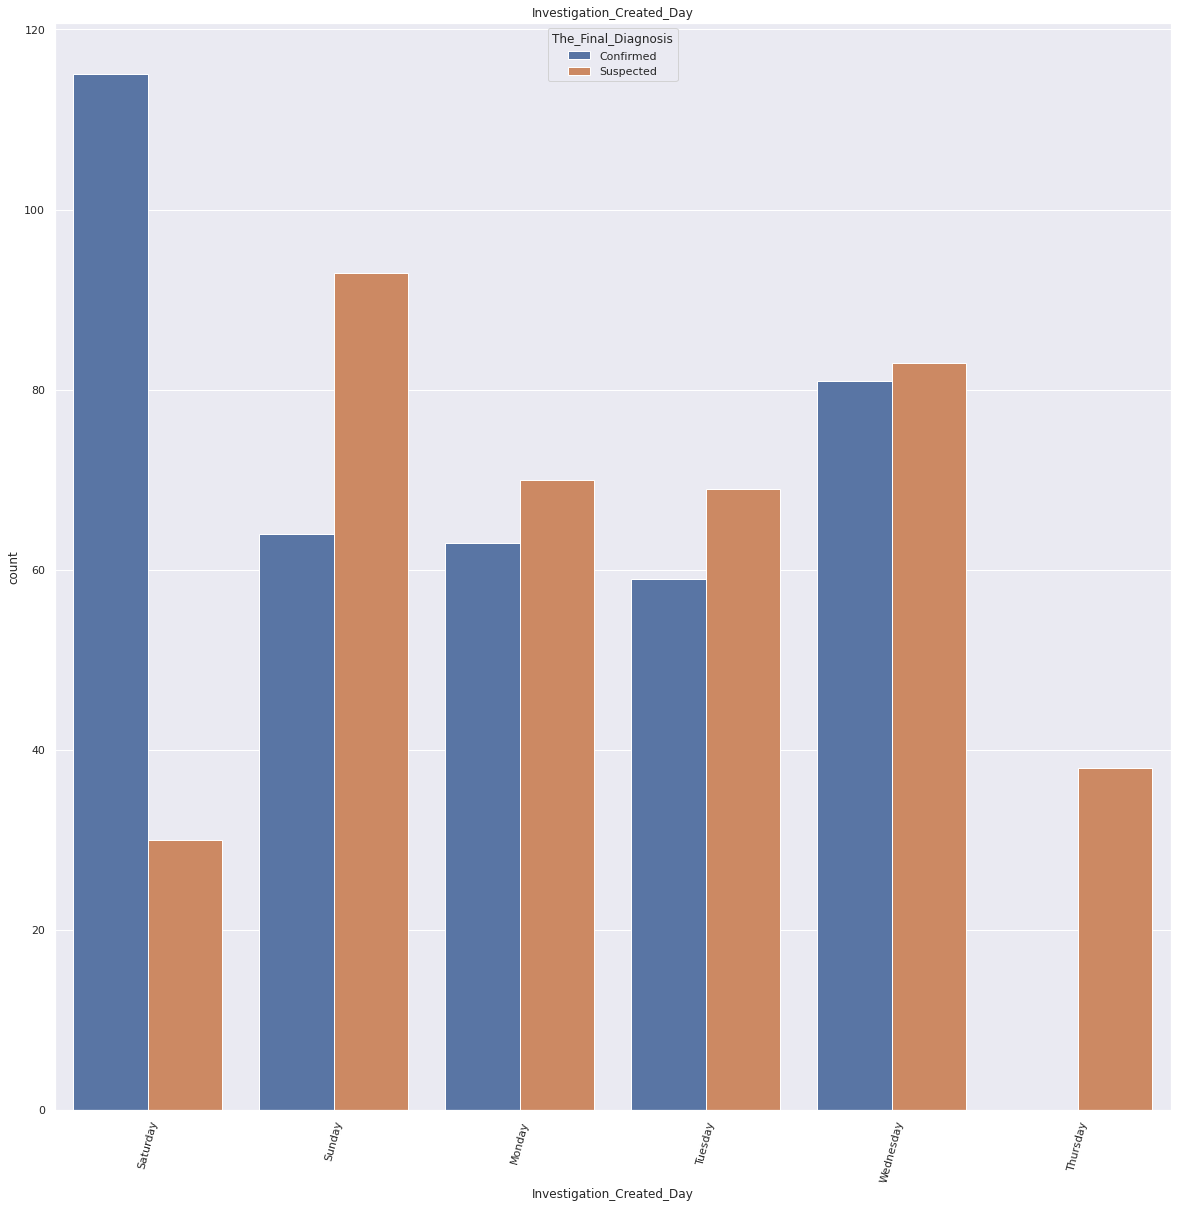

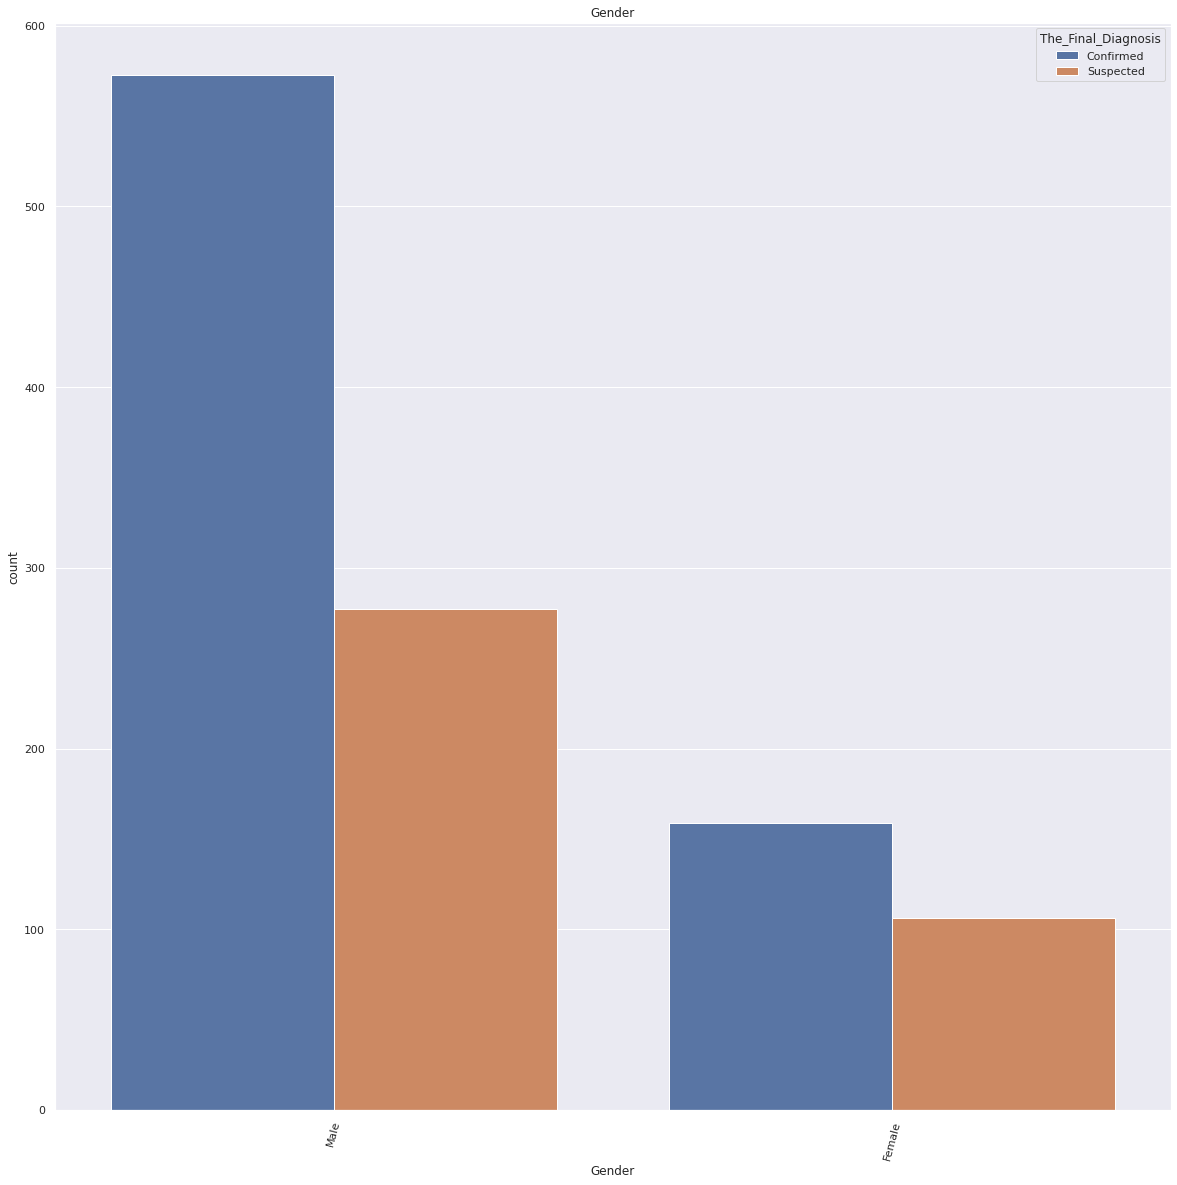

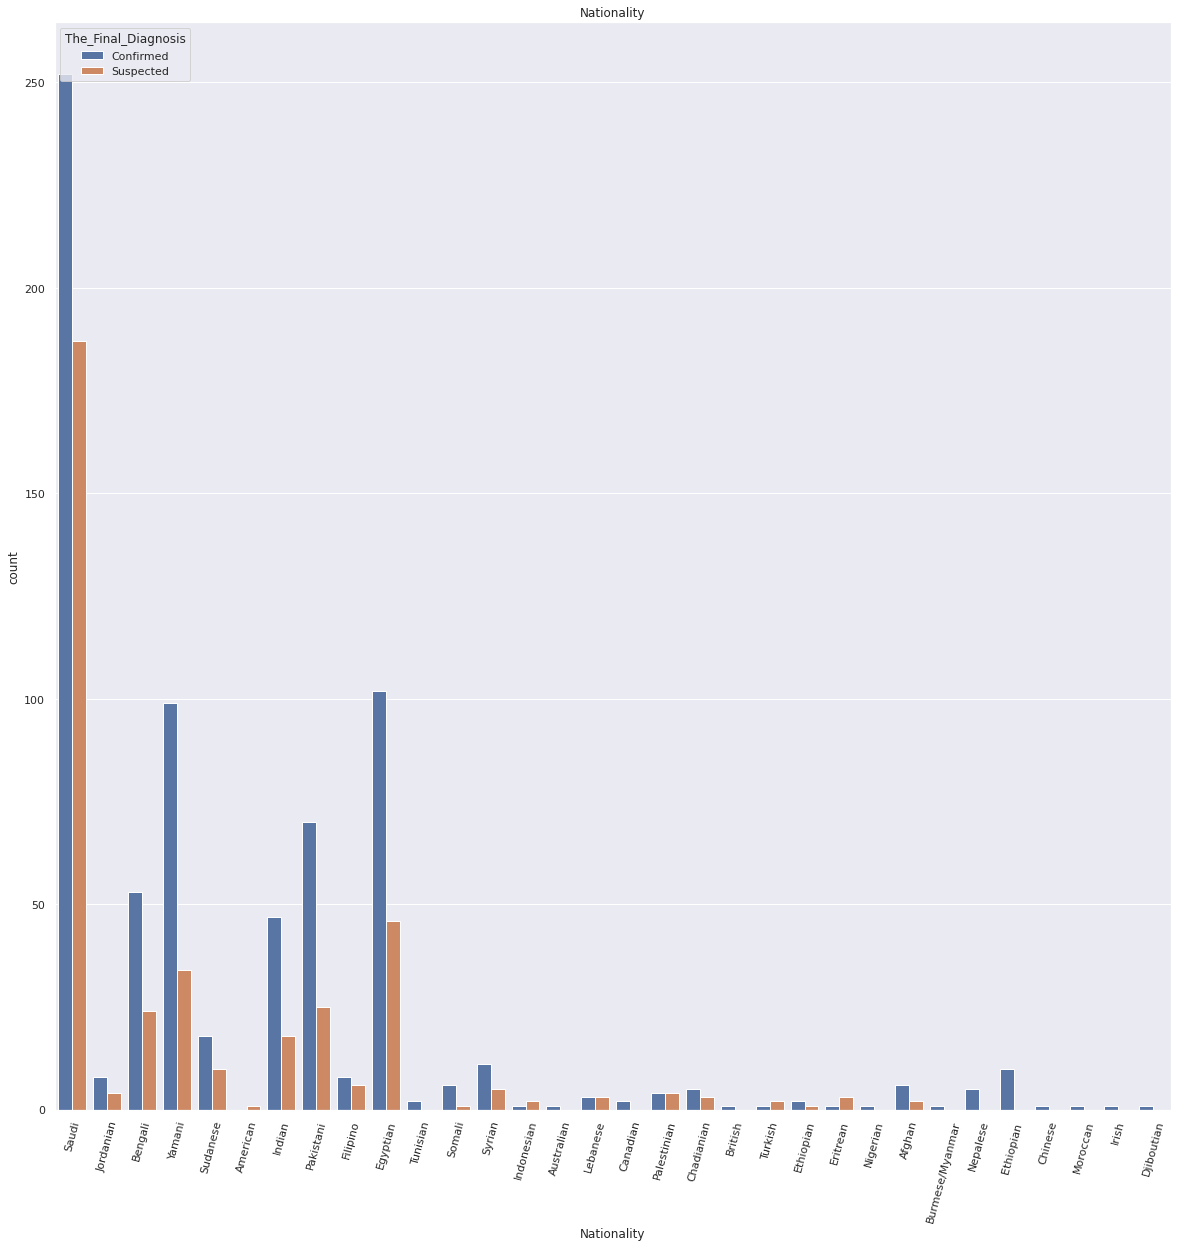

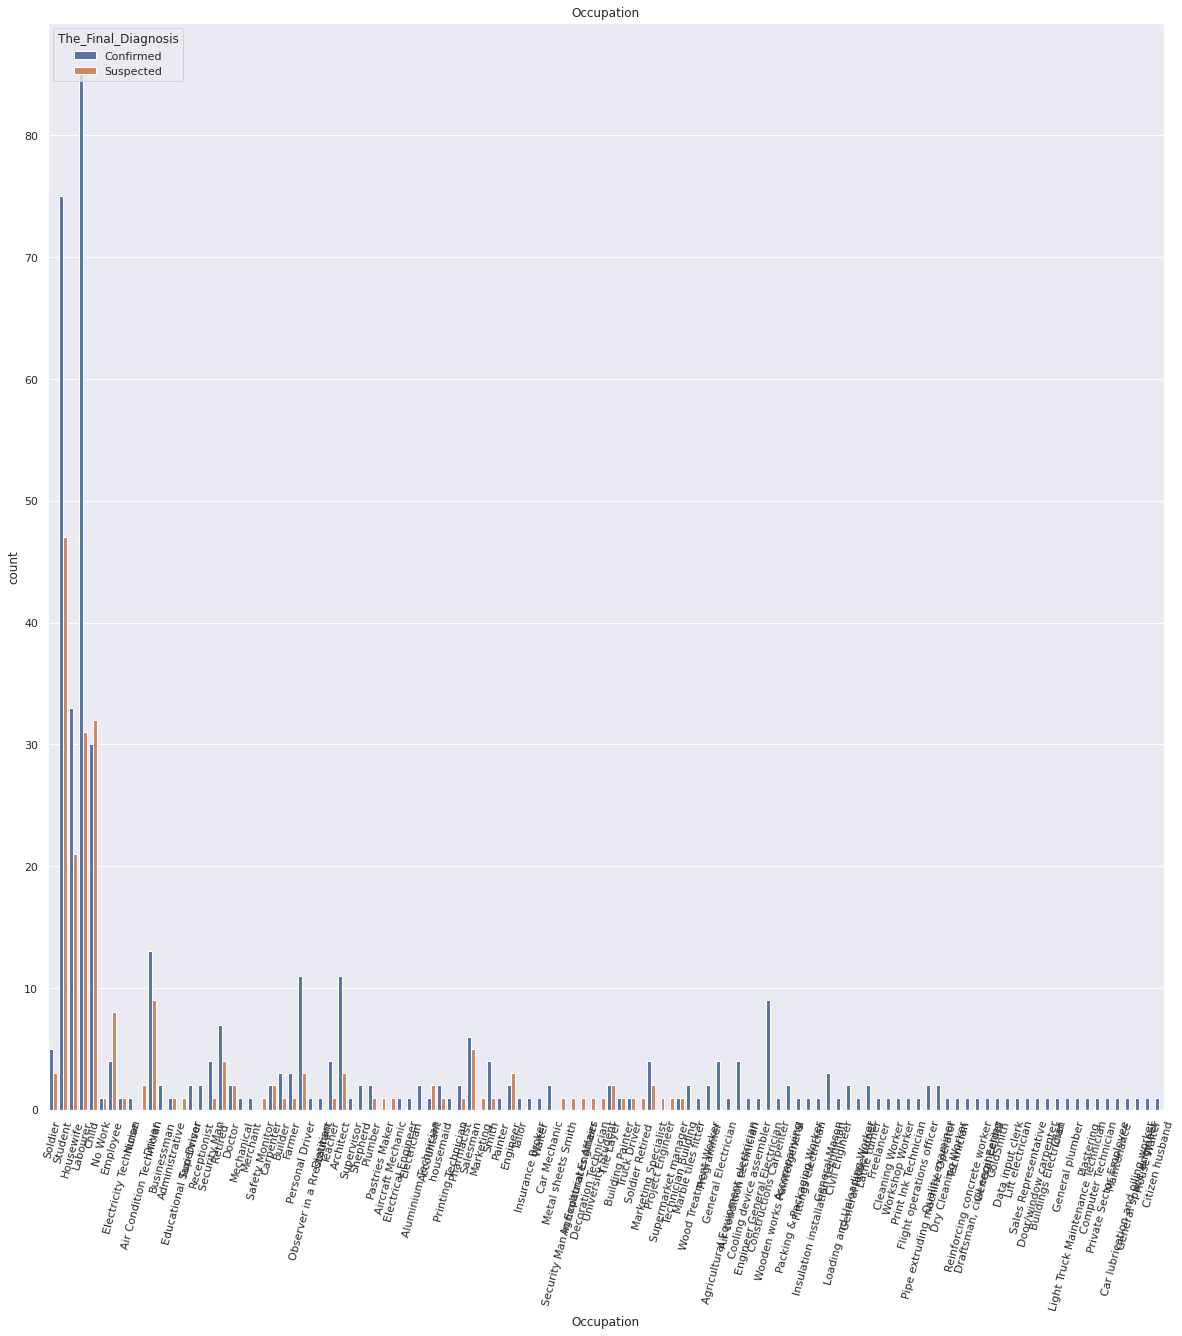

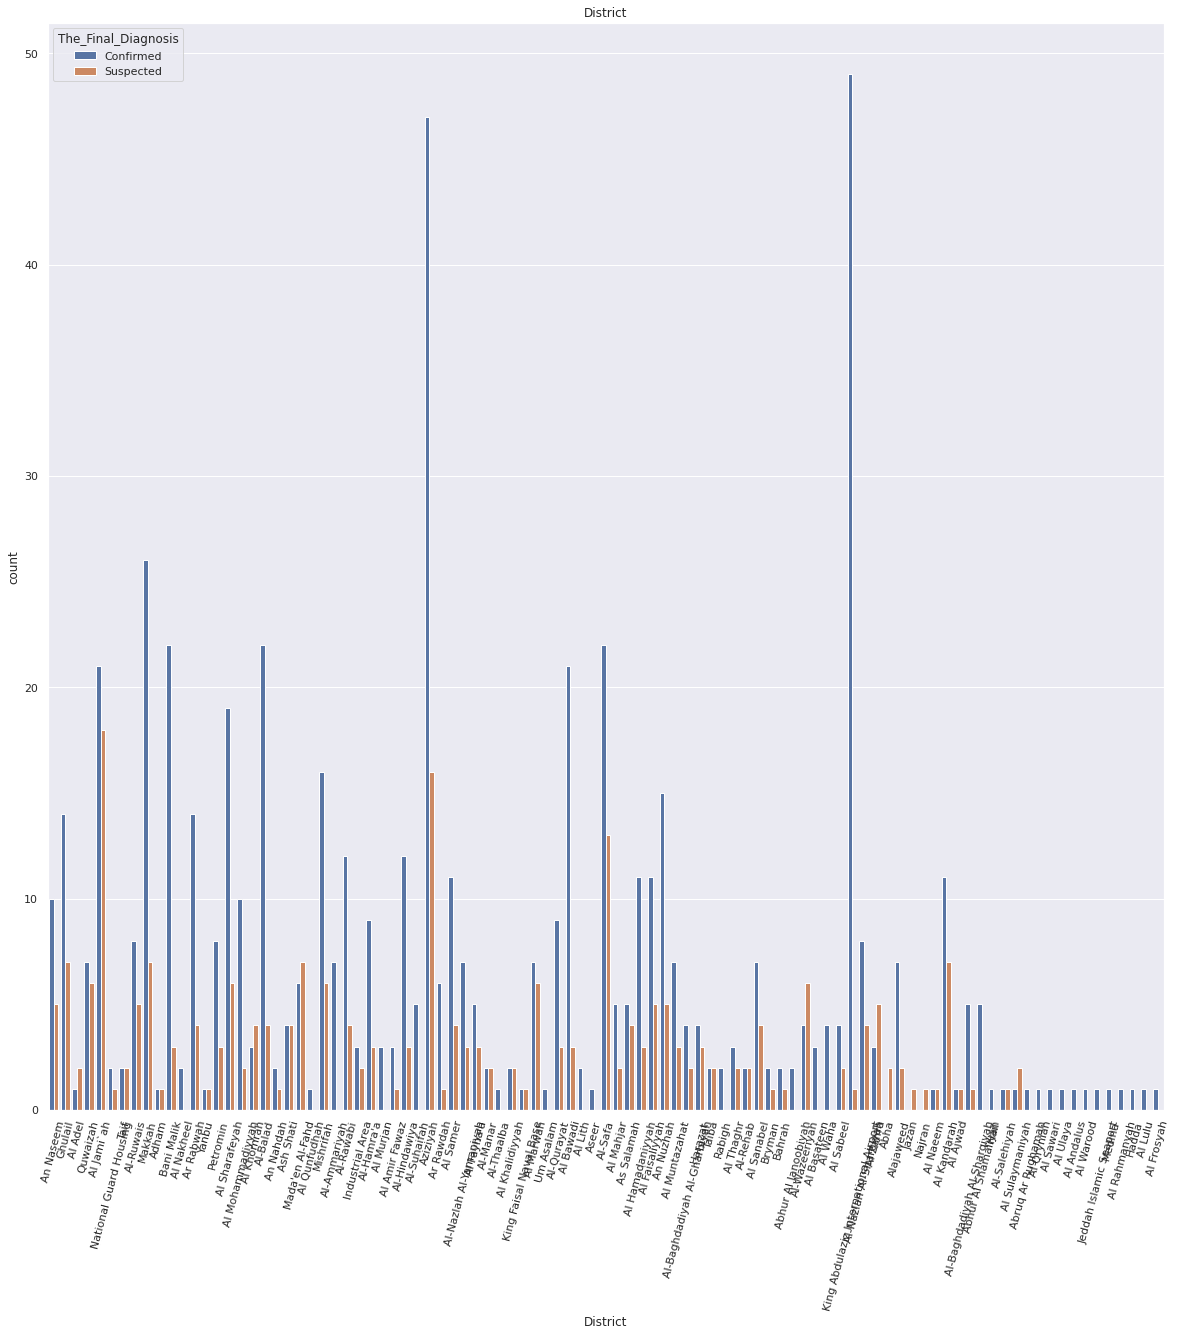

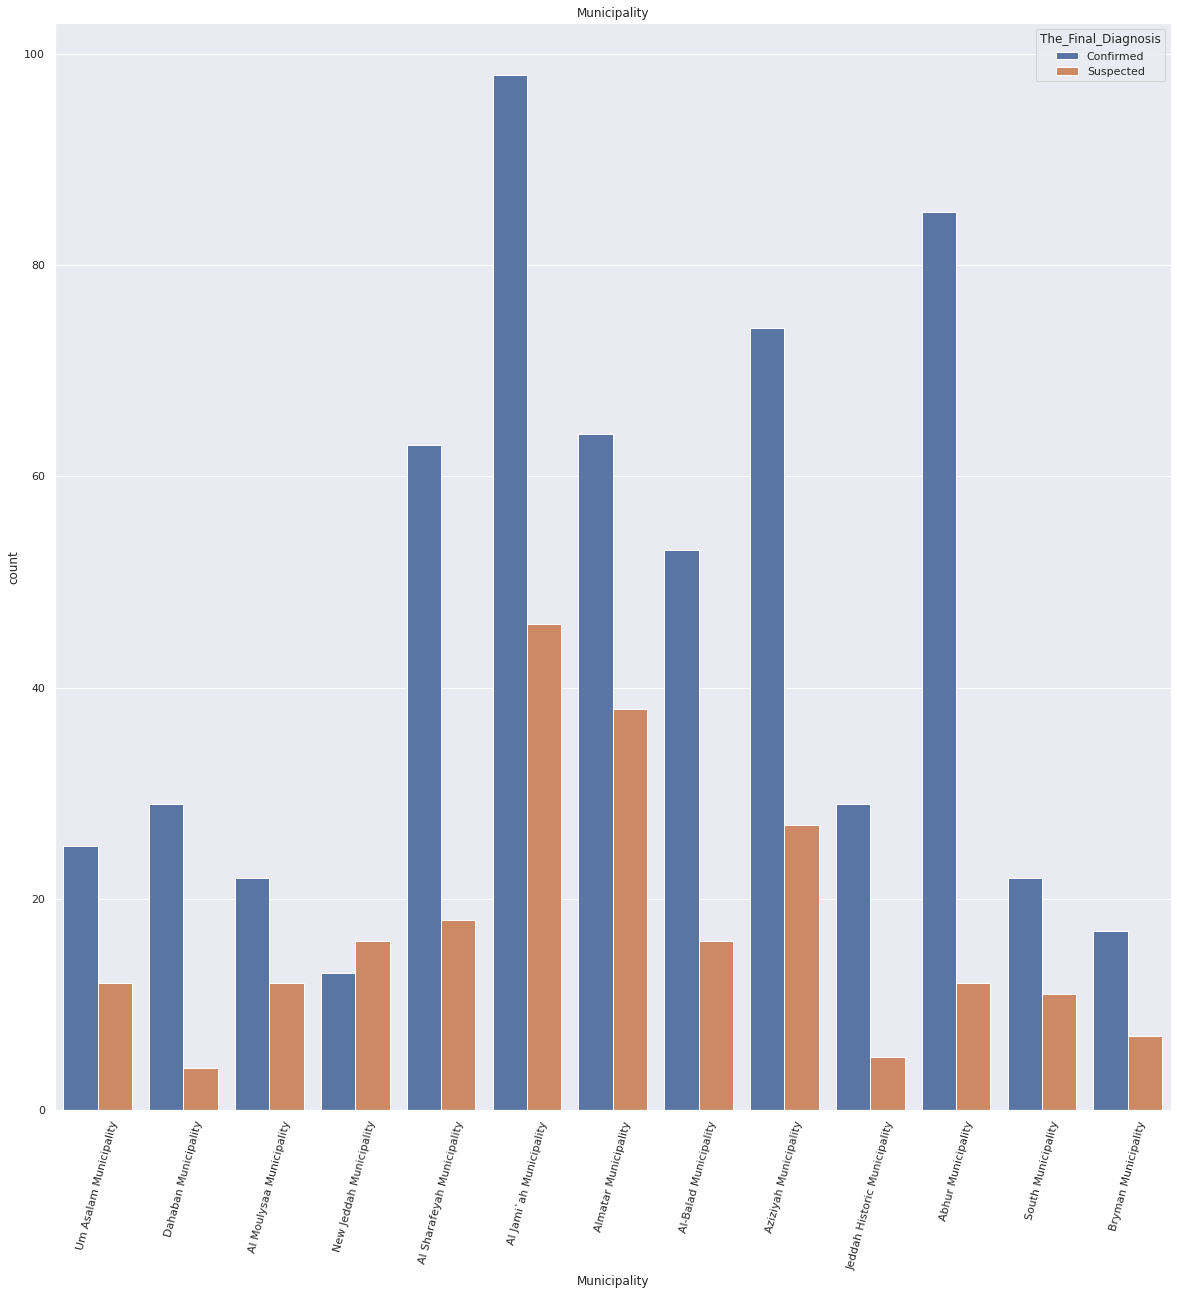

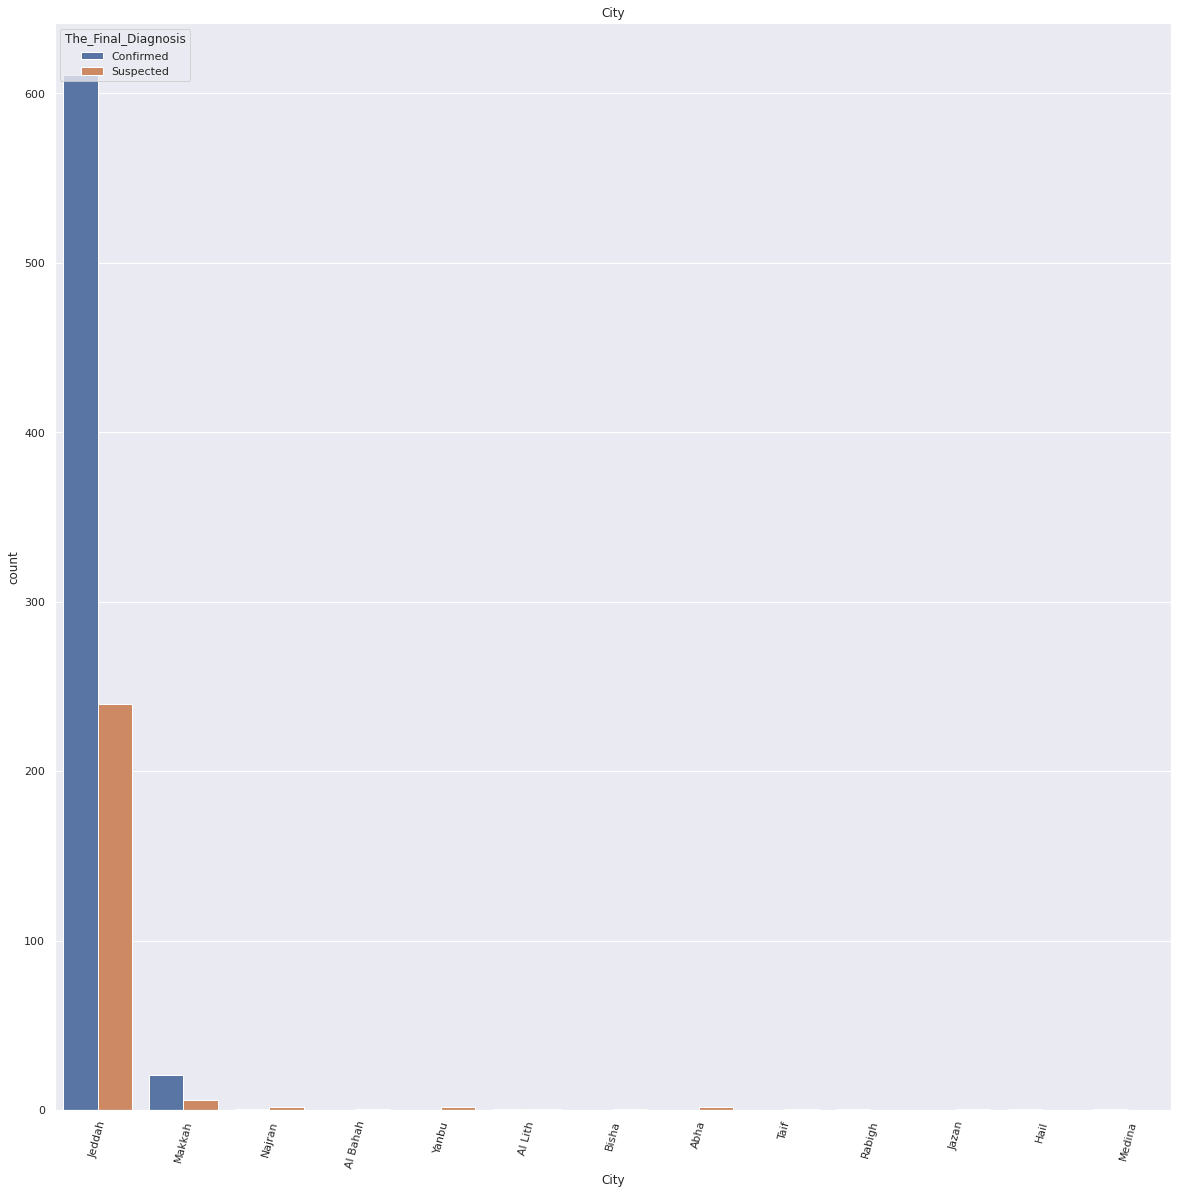

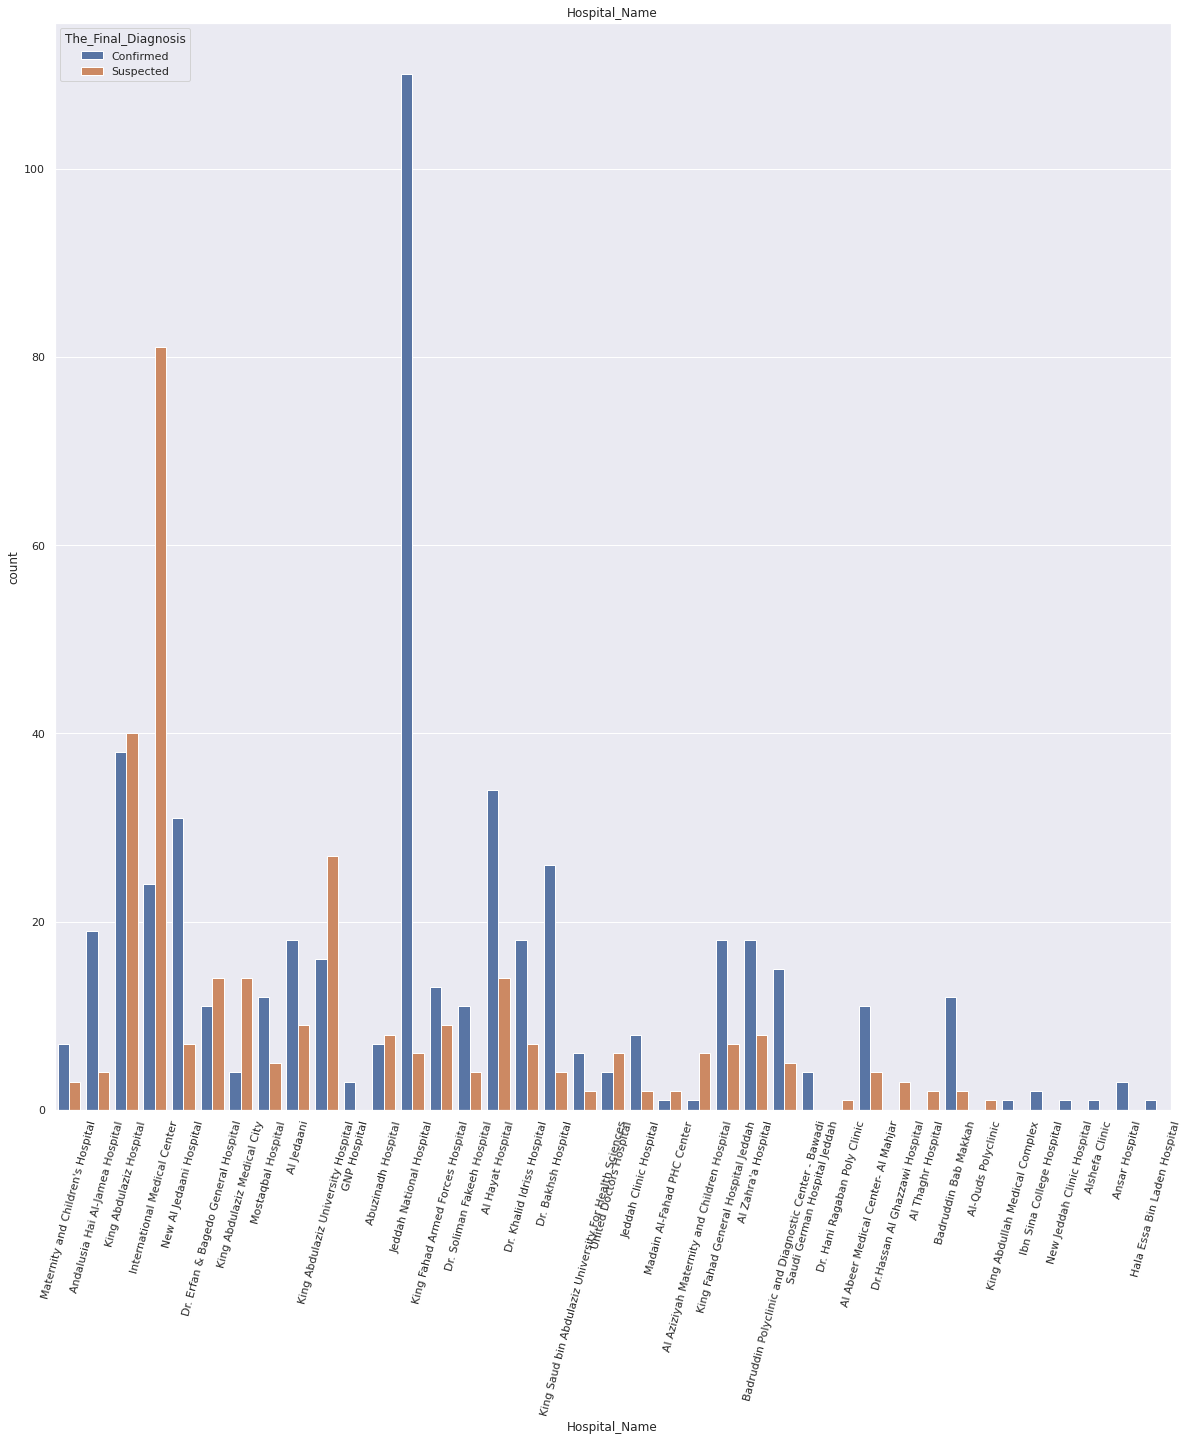

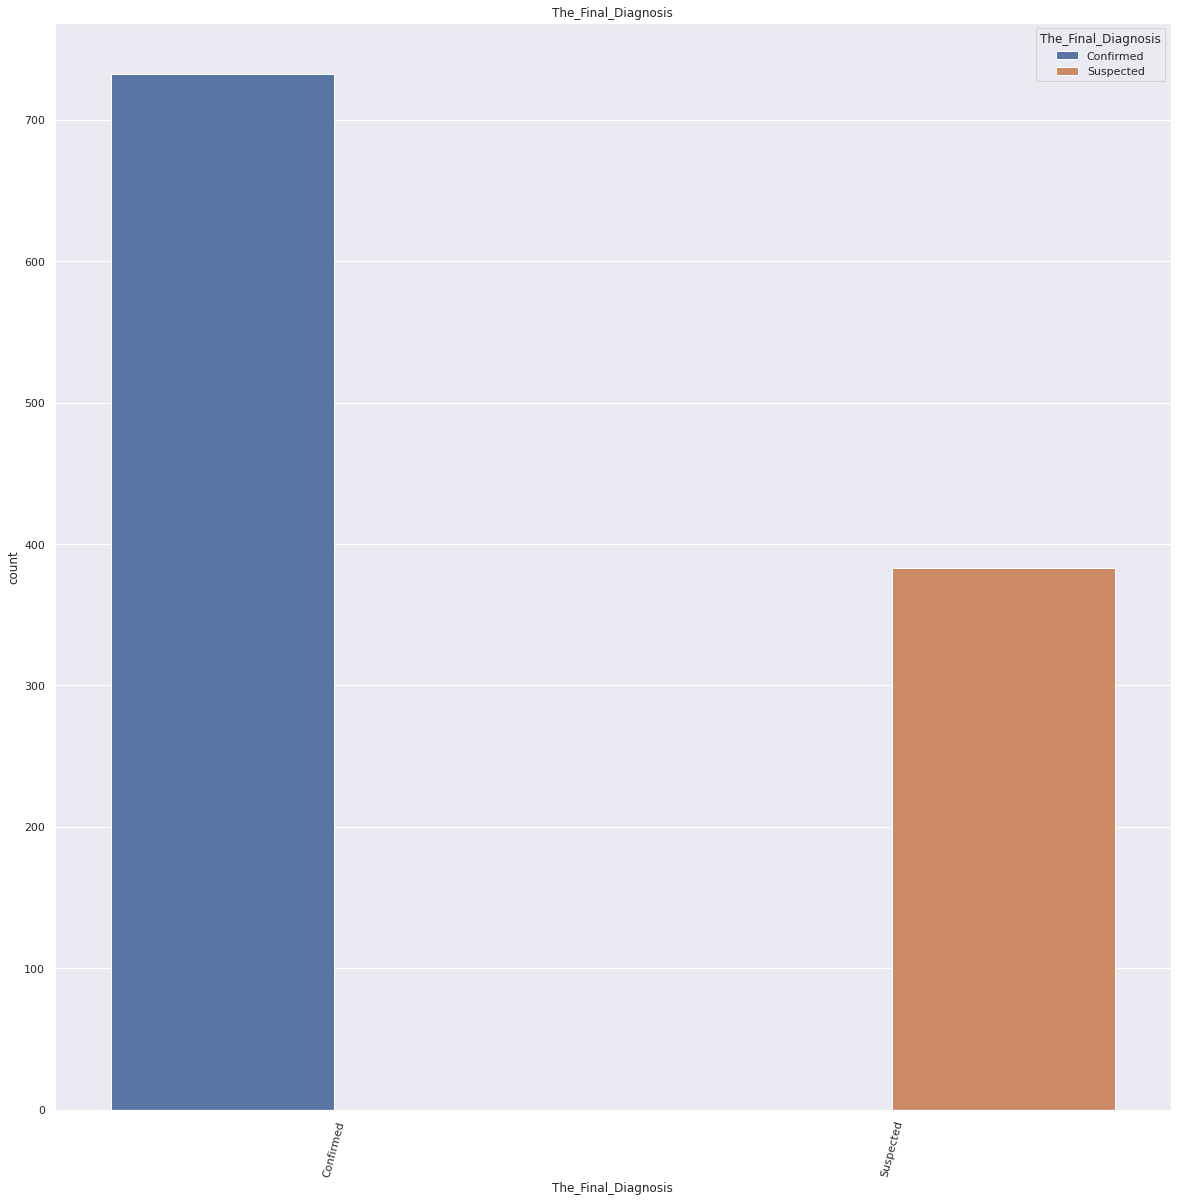

In [28]:
for feature in cat_feature:
    plt.figure(figsize=(20,20))
    g = sns.countplot(df[feature],hue=df['The_Final_Diagnosis'])
    ax=g.set_xticklabels(g.get_xticklabels(), rotation=75)
    plt.title(feature)
    plt.show()

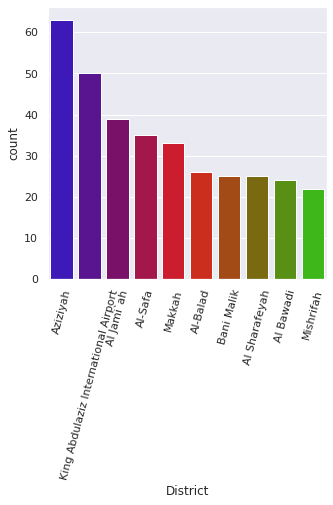

In [29]:
#top10 districts
plt.figure(figsize=(5,5))
g = sns.countplot(x='District', data=df, 
              order=pd.value_counts(df['District']).iloc[:10].index,palette="brg")
ax=g.set_xticklabels(g.get_xticklabels(), rotation=75)

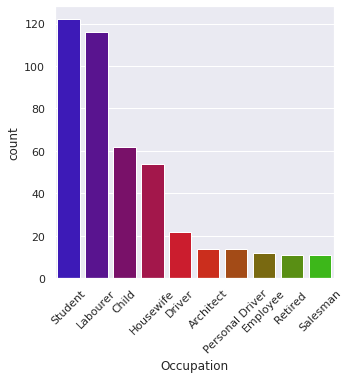

In [30]:
#top10 Occupations
plt.figure(figsize=(5,5))
g = sns.countplot(x='Occupation', data=df, 
              order=pd.value_counts(df['Occupation']).iloc[:10].index,palette="brg")
ax=g.set_xticklabels(g.get_xticklabels(), rotation=45)

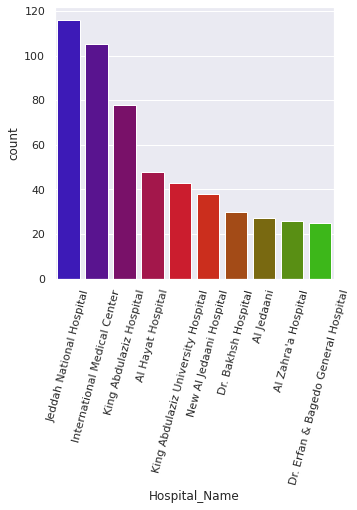

In [31]:
#top10 Hospital Names
plt.figure(figsize=(5,5))
g = sns.countplot(x='Hospital_Name', data=df, 
              order=pd.value_counts(df['Hospital_Name']).iloc[:10].index,palette="brg")
ax=g.set_xticklabels(g.get_xticklabels(), rotation=75)

# Numerical Feature 

In [32]:

num_feature=[feature for feature in df.columns if df[feature].dtypes != 'O']
num_feature

['Week_No',
 'Investigation_Created_Date_Time',
 'Recording_Year',
 'Age',
 'Population',
 'Temperature',
 'Precipitation',
 'Wind_Speed',
 'Humidity',
 'Elevation',
 'Area_CL',
 'Area_HC',
 'Area_TC',
 'Area_SV',
 'Urban_Area',
 'Bare_Area',
 'Area_CBA',
 'Area_UBA',
 'Water_Area']

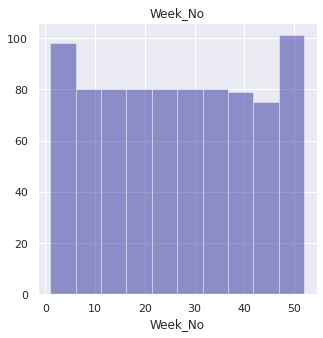

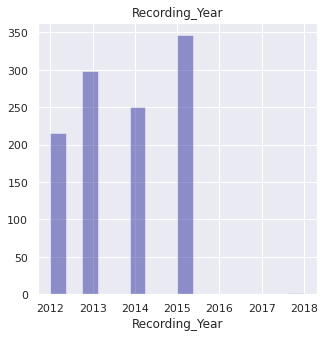

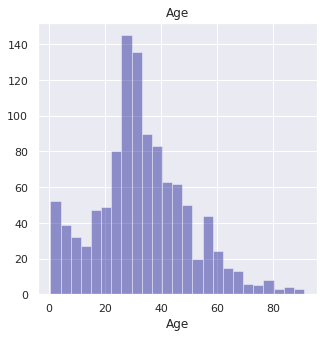

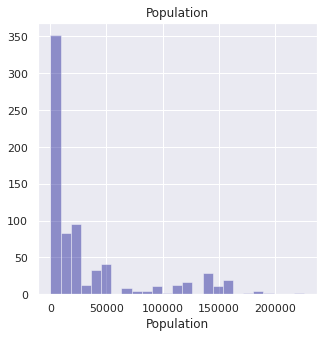

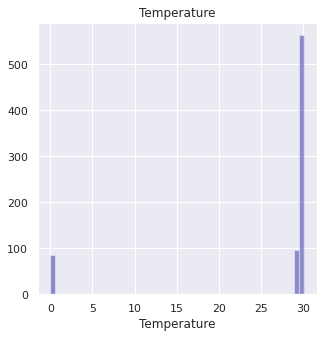

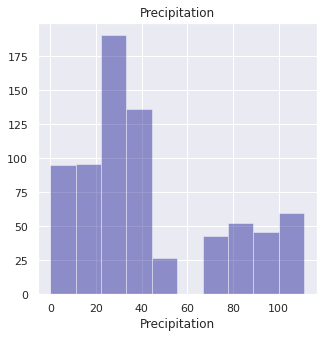

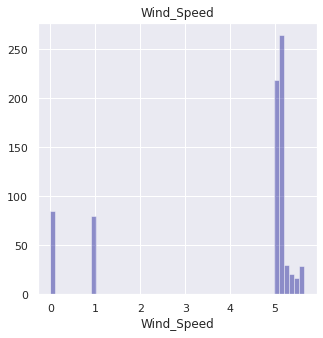

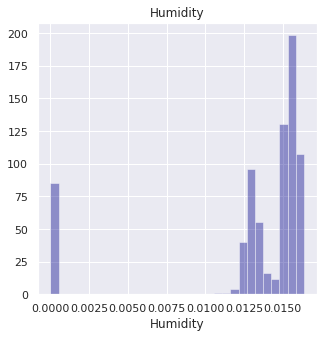

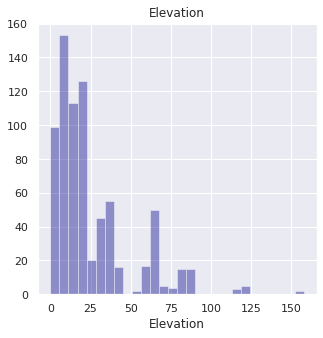

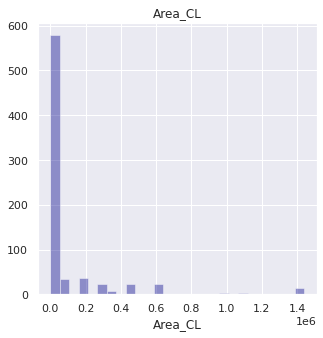

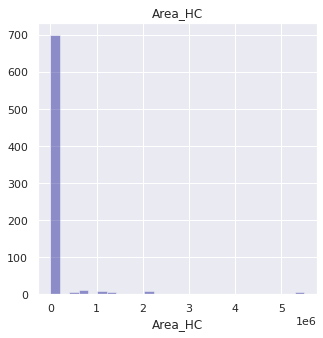

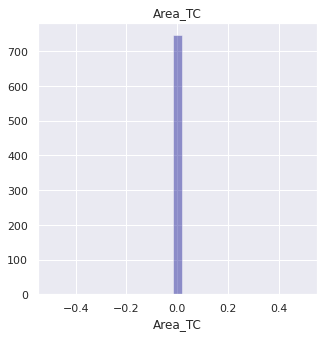

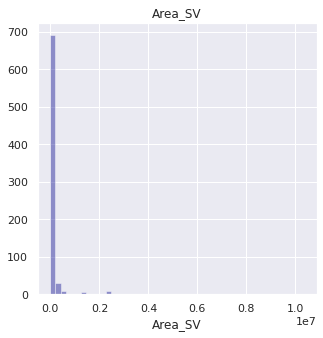

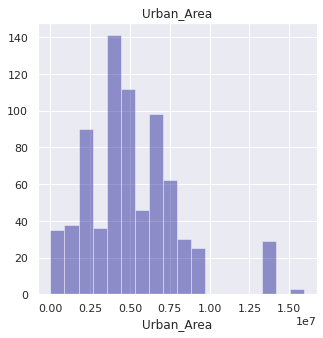

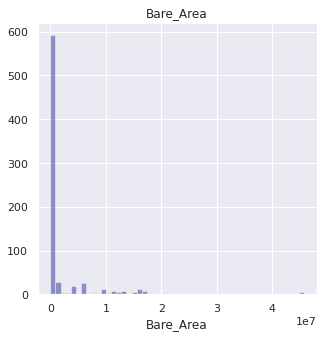

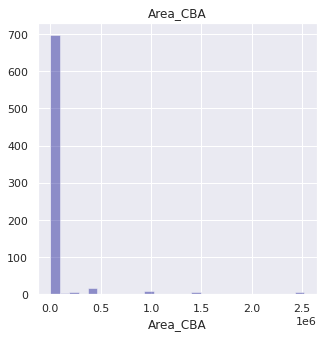

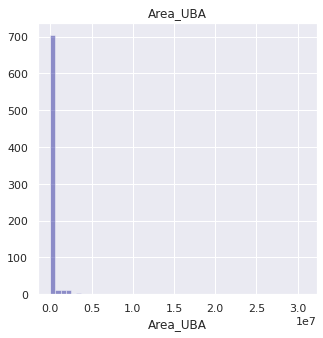

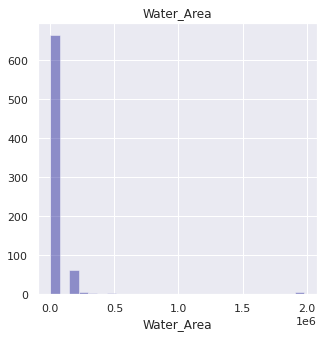

In [33]:
num_feature.pop(1)
for feature in num_feature:
    plt.figure(figsize=(5,5))
    sns.distplot(df[feature],kde=False,color='darkblue')
    plt.title(feature)
    plt.show()

# Outliers

In [38]:
i=9
while i <= 17:
  num_feature.pop(-1)
  i+=1

In [39]:
num_feature

['Week_No',
 'Recording_Year',
 'Age',
 'Population',
 'Temperature',
 'Precipitation',
 'Wind_Speed',
 'Humidity',
 'Elevation']

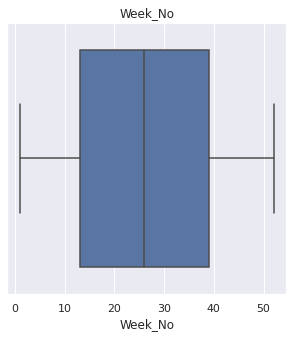

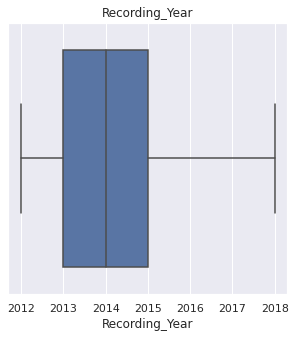

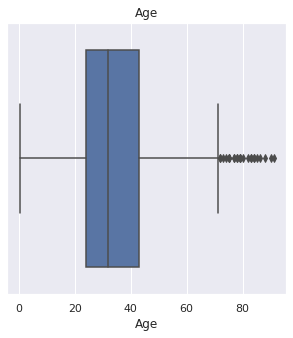

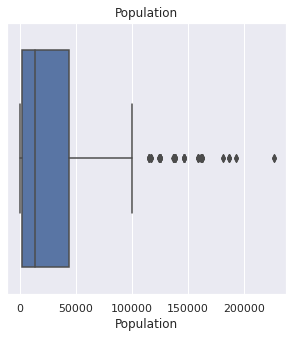

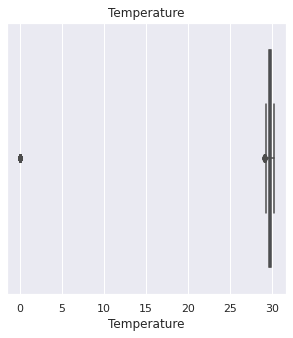

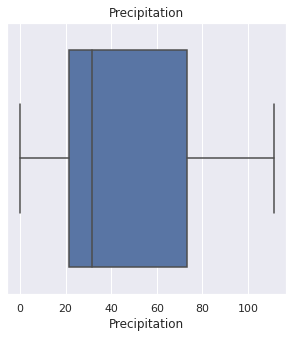

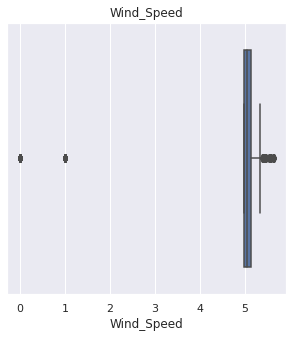

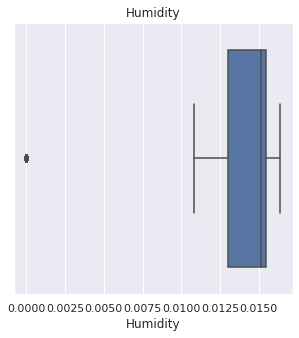

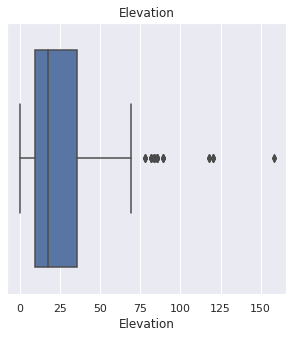

In [41]:
for feature in num_feature:
    plt.figure(figsize=(5,5))
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.show()

# Correlation

In [42]:
cor=df[num_feature].corr()

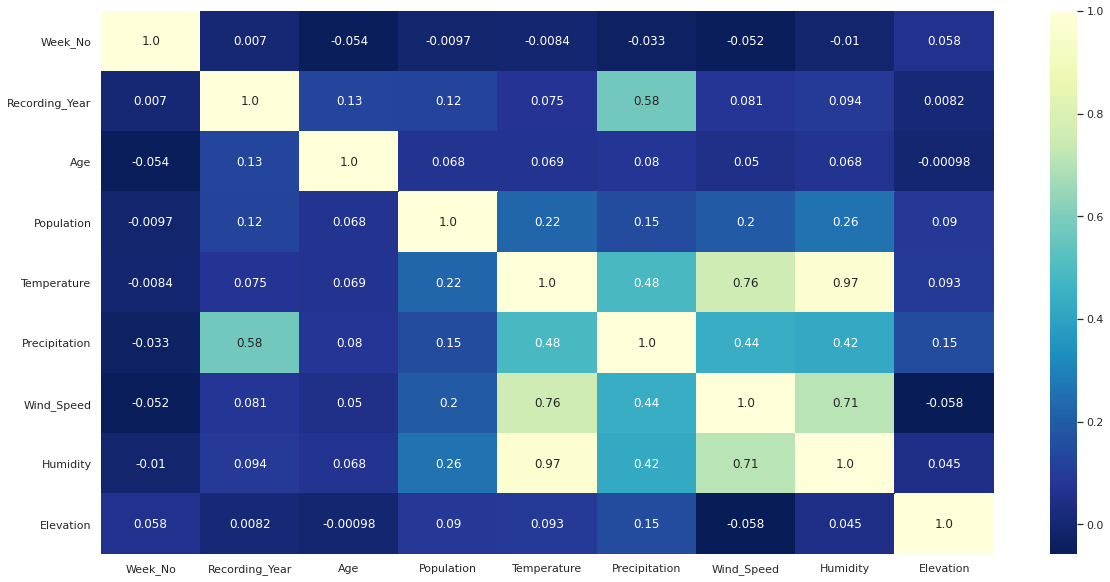

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='YlGnBu_r',fmt='.2')

# Feature Engineering

In [44]:
new_df = df[['Gender','Investigation_Created_Day','Age','Nationality','Occupation','District','Municipality','City','Hospital_Name','The_Final_Diagnosis','Temperature','Precipitation','Wind_Speed','Humidity','Elevation']] 

In [45]:
new_df.head()

,Gender,Investigation_Created_Day,Age,Nationality,Occupation,District,Municipality,City,Hospital_Name,The_Final_Diagnosis,Temperature,Precipitation,Wind_Speed,Humidity,Elevation
Investigation_Id,,,,,,,,,,,,,,,
1,Male,Saturday,26.0,Saudi,Soldier,An Naseem,NaN,Jeddah,Maternity and Children's Hospital,Confirmed,NaN,NaN,NaN,NaN,NaN
2,Male,Saturday,15.0,Saudi,Student,Ghulail,Um Asalam Municipality,Jeddah,Andalusia Hai Al-Jamea Hospital,Confirmed,29.157257,29.832464,1.0,0.012459,15.321481
3,Female,Saturday,24.0,Saudi,Student,An Naseem,Dahaban Municipality,Jeddah,Andalusia Hai Al-Jamea Hospital,Confirmed,0.000000,0.000000,0.0,0.000000,0.000000
4,Male,Saturday,21.0,Saudi,Student,Al Adel,Al Moulysaa Municipality,Jeddah,King Abdulaziz Hospital,Confirmed,0.000000,0.000000,0.0,0.000000,3.353018
5,Male,Saturday,24.0,Saudi,Housewife,Quwaizah,Al Moulysaa Municipality,Jeddah,King Abdulaziz Hospital,Confirmed,NaN,NaN,NaN,NaN,NaN


## Handling Missing Values 

In [46]:
nan_feature=[feature for feature in new_df.columns if new_df[feature].isnull().sum()>1]
nan_feature

['Investigation_Created_Day',
 'Age',
 'Nationality',
 'Occupation',
 'District',
 'Municipality',
 'City',
 'Hospital_Name',
 'Temperature',
 'Precipitation',
 'Wind_Speed',
 'Humidity',
 'Elevation']

In [47]:
num_feature=[feature for feature in new_df.columns if new_df[feature].dtypes != 'O']
num_feature

['Age', 'Temperature', 'Precipitation', 'Wind_Speed', 'Humidity', 'Elevation']

In [48]:
for feature in num_feature:
    mean = new_df[feature].mean()
    new_df[feature].replace(np.nan, mean, inplace = True)

In [49]:
nan_feature=[feature for feature in new_df.columns if new_df[feature].isnull().sum()>1]
nan_feature

['Investigation_Created_Day',
 'Nationality',
 'Occupation',
 'District',
 'Municipality',
 'City',
 'Hospital_Name']

In [50]:
new_df.head()

,Gender,Investigation_Created_Day,Age,Nationality,Occupation,District,Municipality,City,Hospital_Name,The_Final_Diagnosis,Temperature,Precipitation,Wind_Speed,Humidity,Elevation
Investigation_Id,,,,,,,,,,,,,,,
1,Male,Saturday,26.0,Saudi,Soldier,An Naseem,NaN,Jeddah,Maternity and Children's Hospital,Confirmed,26.335262,42.461380,4.104621,0.012999,25.575908
2,Male,Saturday,15.0,Saudi,Student,Ghulail,Um Asalam Municipality,Jeddah,Andalusia Hai Al-Jamea Hospital,Confirmed,29.157257,29.832464,1.000000,0.012459,15.321481
3,Female,Saturday,24.0,Saudi,Student,An Naseem,Dahaban Municipality,Jeddah,Andalusia Hai Al-Jamea Hospital,Confirmed,0.000000,0.000000,0.000000,0.000000,0.000000
4,Male,Saturday,21.0,Saudi,Student,Al Adel,Al Moulysaa Municipality,Jeddah,King Abdulaziz Hospital,Confirmed,0.000000,0.000000,0.000000,0.000000,3.353018
5,Male,Saturday,24.0,Saudi,Housewife,Quwaizah,Al Moulysaa Municipality,Jeddah,King Abdulaziz Hospital,Confirmed,26.335262,42.461380,4.104621,0.012999,25.575908


In [51]:
cat_feature=[feature for feature in new_df.columns if new_df[feature].dtypes == 'O']
cat_feature

['Gender',
 'Investigation_Created_Day',
 'Nationality',
 'Occupation',
 'District',
 'Municipality',
 'City',
 'Hospital_Name',
 'The_Final_Diagnosis']

In [52]:
for feature in cat_feature:
    #mean = new_df[feature].mean()
    new_df[feature].replace(np.nan, 'UNKNOWN', inplace = True)

In [53]:
nan_feature=[feature for feature in new_df.columns if new_df[feature].isnull().sum()>1]
nan_feature

[]

In [54]:
new_df.head()

,Gender,Investigation_Created_Day,Age,Nationality,Occupation,District,Municipality,City,Hospital_Name,The_Final_Diagnosis,Temperature,Precipitation,Wind_Speed,Humidity,Elevation
Investigation_Id,,,,,,,,,,,,,,,
1,Male,Saturday,26.0,Saudi,Soldier,An Naseem,UNKNOWN,Jeddah,Maternity and Children's Hospital,Confirmed,26.335262,42.461380,4.104621,0.012999,25.575908
2,Male,Saturday,15.0,Saudi,Student,Ghulail,Um Asalam Municipality,Jeddah,Andalusia Hai Al-Jamea Hospital,Confirmed,29.157257,29.832464,1.000000,0.012459,15.321481
3,Female,Saturday,24.0,Saudi,Student,An Naseem,Dahaban Municipality,Jeddah,Andalusia Hai Al-Jamea Hospital,Confirmed,0.000000,0.000000,0.000000,0.000000,0.000000
4,Male,Saturday,21.0,Saudi,Student,Al Adel,Al Moulysaa Municipality,Jeddah,King Abdulaziz Hospital,Confirmed,0.000000,0.000000,0.000000,0.000000,3.353018
5,Male,Saturday,24.0,Saudi,Housewife,Quwaizah,Al Moulysaa Municipality,Jeddah,King Abdulaziz Hospital,Confirmed,26.335262,42.461380,4.104621,0.012999,25.575908


# Handling Categorical Features

In [55]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [56]:
data=new_df.copy()
for feature in cat_feature:
    data[feature] = le.fit_transform(data[feature])

In [57]:
data.head()

,Gender,Investigation_Created_Day,Age,Nationality,Occupation,District,Municipality,City,Hospital_Name,The_Final_Diagnosis,Temperature,Precipitation,Wind_Speed,Humidity,Elevation
Investigation_Id,,,,,,,,,,,,,,,
1,1,1,26.0,25,94,62,12,6,33,0,26.335262,42.461380,4.104621,0.012999,25.575908
2,1,1,15.0,25,96,73,13,6,9,0,29.157257,29.832464,1.000000,0.012459,15.321481
3,0,1,24.0,25,96,62,8,6,9,0,0.000000,0.000000,0.000000,0.000000,0.000000
4,1,1,21.0,25,96,5,2,6,25,0,0.000000,0.000000,0.000000,0.000000,3.353018
5,1,1,24.0,25,52,89,2,6,25,0,26.335262,42.461380,4.104621,0.012999,25.575908


In [58]:
data['The_Final_Diagnosis'].value_counts()

0    732
1    383
Name: The_Final_Diagnosis, dtype: int64

In [59]:
y = data['The_Final_Diagnosis']
X = data[['Gender','Investigation_Created_Day','Age','Nationality','Occupation','District','Municipality','City','Temperature','Precipitation','Wind_Speed','Humidity','Elevation']]

## Balancing the Dataset 

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [69]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(k_neighbors=2)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)

In [70]:
len(y_res)

1026

## Normalizing the Dataset

In [73]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_res)
x_scaled

array([[1.        , 0.        , 0.36046789, ..., 0.72739392, 0.7940519 ,
        0.1619034 ],
       [1.        , 1.        , 0.34864208, ..., 0.72739392, 0.7940519 ,
        0.1619034 ],
       [1.        , 0.33333333, 0.32656216, ..., 0.91314824, 1.        ,
        0.01944855],
       ...,
       [0.17701839, 0.9114908 , 0.57070996, ..., 0.72739392, 0.7940519 ,
        0.1619034 ],
       [1.        , 0.66666667, 0.52669942, ..., 0.90157251, 0.81245352,
        0.29795715],
       [0.92843161, 0.        , 0.02100946, ..., 0.72739392, 0.7940519 ,
        0.1619034 ]])

In [74]:
x_scaled_test = min_max_scaler.fit_transform(X_test)
x_scaled_test

array([[0.        , 0.        , 0.04554588, ..., 0.72919568, 0.7940519 ,
        0.21266471],
       [1.        , 0.83333333, 0.20741237, ..., 0.72919568, 0.7940519 ,
        0.21266471],
       [1.        , 0.33333333, 0.        , ..., 0.97281652, 0.90360415,
        0.0510454 ],
       ...,
       [1.        , 0.33333333, 0.25206519, ..., 0.93715015, 0.90390959,
        0.17288437],
       [1.        , 1.        , 0.37486046, ..., 0.17765236, 0.97086133,
        0.54730242],
       [1.        , 0.        , 0.51998214, ..., 0.88661054, 0.79645693,
        0.10044255]])

## Modeling 

In [75]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(x_scaled, y_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [76]:
y_hat = clf.predict(x_scaled_test)

In [77]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       219
           1       0.64      0.57      0.60       116

    accuracy                           0.74       335
   macro avg       0.71      0.70      0.70       335
weighted avg       0.73      0.74      0.74       335



In [80]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC()
model.fit(x_scaled, y_res)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [81]:
y_pred=model.predict(x_scaled_test)

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.60      0.68       219
           1       0.47      0.66      0.55       116

    accuracy                           0.62       335
   macro avg       0.62      0.63      0.61       335
weighted avg       0.67      0.62      0.63       335



In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
clf = GradientBoostingClassifier().fit(x_scaled, y_res)

In [85]:
y_pred = clf.predict(x_scaled_test)

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       219
           1       0.64      0.73      0.69       116

    accuracy                           0.77       335
   macro avg       0.75      0.76      0.75       335
weighted avg       0.78      0.77      0.77       335



In [87]:
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [89]:
clf = clf.fit(x_scaled, y_res)

In [90]:
y_pred = clf.predict(x_scaled_test)

In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       219
           1       0.60      0.60      0.60       116

    accuracy                           0.72       335
   macro avg       0.69      0.69      0.69       335
weighted avg       0.72      0.72      0.72       335



# **Correlation between suspect and confirmed cases**

In [107]:
confirm_df = new_df[['Temperature','Precipitation','Wind_Speed','Humidity','Elevation']][new_df['The_Final_Diagnosis'].isin(['Confirmed'])]

In [108]:
confirm_df

,Temperature,Precipitation,Wind_Speed,Humidity,Elevation
Investigation_Id,,,,,
1,26.335262,42.461380,4.104621,0.012999,25.575908
2,29.157257,29.832464,1.000000,0.012459,15.321481
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,3.353018
5,26.335262,42.461380,4.104621,0.012999,25.575908
...,...,...,...,...,...
1111,29.736755,73.091373,5.086421,0.015112,22.265804
1112,26.335262,42.461380,4.104621,0.012999,25.575908
1113,29.754211,107.384174,5.137621,0.015566,36.390258


In [133]:
confirm_df = confirm_df[:383]

In [134]:
suspect_df = new_df[['Temperature','Precipitation','Wind_Speed','Humidity','Elevation']][new_df['The_Final_Diagnosis'].isin(['Suspected'])]

In [135]:
suspect_df.rename(columns={'Temperature': 'tmp'},inplace = True)

In [139]:
suspect_df.shape

(383, 5)

In [144]:
suspect_df.corrwith(confirm_df.Temperature)

tmp             NaN
Precipitation   NaN
Wind_Speed      NaN
Humidity        NaN
Elevation       NaN
dtype: float64

the values of the ith or jth variable do not vary, then the respective standard deviation will be zero and so will the denominator of the fraction. Thus, the correlation will be NaN.